<h1>🎯 OBJECTIVE

Upon initial inspection of the data, we can start thinking of some questions about it that we would want to answer.

- Which customer segments contribute most to high average order values in the top 10 performing areas?

- How are customer segments distributed within the top 20 regions by total customer count?

- Which five regions generate the highest average order value?

- Who are the top five customers based on total number of purchases?

- Which customer segment exhibits the highest repeat purchase behavior based on the total number of orders and the average orders per customer?

<h1 style="color:lightGreen; font-size:20px; font-weight:bold; background-color:#1C1C1C;padding:6px; border-radius:3px;">1.Importing Required Libraries</h1>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

<h1 style="color:lightGreen; font-size:20px; font-weight:bold; background-color:#1C1C1C;padding:6px; border-radius:3px;">2.Loading the Dataset</h1>

In [65]:
df = pd.read_csv(r"D:\HOME - STUDY\DEPI-Graduation Project\مشروع DEpi\cleaned_blinkit_customers.csv")

<h1 style="color:lightGreen; font-size:20px; font-weight:bold; background-color:#1C1C1C;padding:6px; border-radius:3px;">3.Exploring the Data</h1>

##### <span style="color:darkgreen"> examining the dataset to understand its structure, quality, and key characteristics before performing analysis.


In [61]:
# Show the first 10 rows
df.head(10)

customer_id      customer_name                      email         phone  \
0     97475543      Niharika Nagi     ektataneja@example.org  9.129880e+11   
1     22077605       Megha Sachar       vedant45@example.com  9.151230e+11   
2     47822591         Hema Bahri      samiazaan@example.com  9.100340e+11   
3     79726146         Zaitra Vig      ishanvi87@example.org  9.162640e+11   
4     57102800       Januja Verma   atideshpande@example.org  9.172940e+11   
5     54748429         Darsh More         ynayar@example.org  9.125820e+11   
6     49152878     Patrick Sandhu  zehaanmahajan@example.org  9.124130e+11   
7     16379942  Harshil Kuruvilla  pathakanirudh@example.org  9.138070e+11   
8     11071601         Ojas Ahuja        sneha11@example.com  9.128650e+11   
9     68164013      Netra Chander       hwarrior@example.org  9.176460e+11   

                               address           area  pincode  \
0  23, Nayar Path, Bihar Sharif-154625          Udupi   321865   
1  51/302, Buch Chowk\nSrinagar-570271        Aligarh   149394   
2   941\nAnne Street, Darbhanga 186125      Begusarai   621411   
3       43/94, Ghosh, Alappuzha 635655      Kozhikode   826054   
4             06\nOm, Ambarnath 477463   Ichalkaranji   730539   
5    26/961\nSalvi Circle, Durg 406361  Visakhapatnam   883122   
6   304\nTara Road, Gandhinagar-559930        Gwalior   649817   
7      37/62, Basu Chowk\nSikar 515907           Orai   332997   
8  H.No. 99\nKade Road\nRamgarh 695009          Buxar   528426   
9  H.No. 94\nGupta Path, Hospet-831040       Malegaon     4515   

  registration_date customer_segment  total_orders  avg_order_value  \
0        2023-05-13          Premium            13           451.92   
1        2024-06-18         Inactive             4           825.48   
2        2024-09-25          Regular            17          1969.81   
3        2023-10-04              New             4           220.09   
4        2024-03-22         Inactive            14           578.14   
5        2024-04-22              New             2           669.35   
6        2024-09-13          Premium             4           973.62   
7        2024-04-10         Inactive            15          1370.56   
8        2023-07-04         Inactive            17          1950.54   
9        2023-06-29              New             1          1061.82   

   registration_year registration_month  
0               2023            2023-05  
1               2024            2024-06  
2               2024            2024-09  
3               2023            2023-10  
4               2024            2024-03  
5               2024            2024-04  
6               2024            2024-09  
7               2024            2024-04  
8               2023            2023-07  
9               2023            2023-06

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        2500 non-null   int64  
 1   customer_name      2500 non-null   object 
 2   email              2500 non-null   object 
 3   phone              2500 non-null   float64
 4   address            2500 non-null   object 
 5   area               2500 non-null   object 
 6   pincode            2500 non-null   int64  
 7   registration_date  2500 non-null   object 
 8   customer_segment   2500 non-null   object 
 9   total_orders       2500 non-null   int64  
 10  avg_order_value    2500 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 215.0+ KB


<h1 style="color:lightGreen; font-size:20px; font-weight:bold; background-color:#1C1C1C;padding:6px; border-radius:3px;">4.Answer Questions about the Data</h1>

<h3>Which customer segments contribute most to high average order values in the top 10 performing areas?

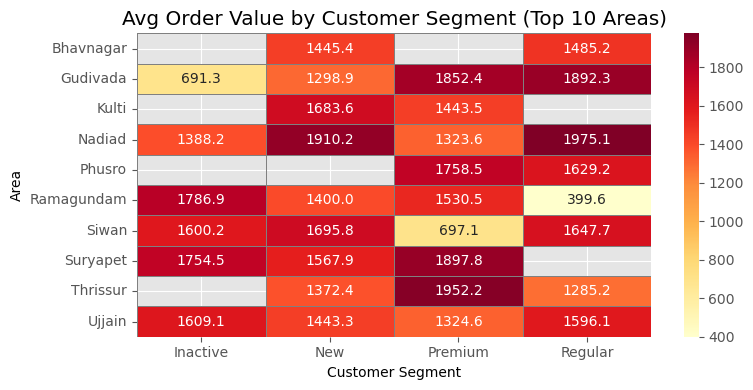

In [39]:
# Filter: Top 20 areas by average order value (overall, not per segment)
top_areas = df.groupby('area')['avg_order_value'].mean().nlargest(10).index
filtered_df = df[df['area'].isin(top_areas)]

# Group by segment and area (filtered)
segment_area_value = filtered_df.groupby(['customer_segment', 'area'])['avg_order_value'].mean().reset_index()
pivot_value = segment_area_value.pivot(index='area', columns='customer_segment', values='avg_order_value')

# Plot
plt.figure(figsize=(8, 4))
sns.heatmap(pivot_value, cmap='YlOrRd', linewidths=0.5, linecolor='gray', annot=True, fmt=".1f")
plt.title('Avg Order Value by Customer Segment (Top 10 Areas)')
plt.xlabel('Customer Segment')
plt.ylabel('Area')
plt.tight_layout()
plt.show()


<h3>How are customer segments distributed within the top 20 regions by total customer count?

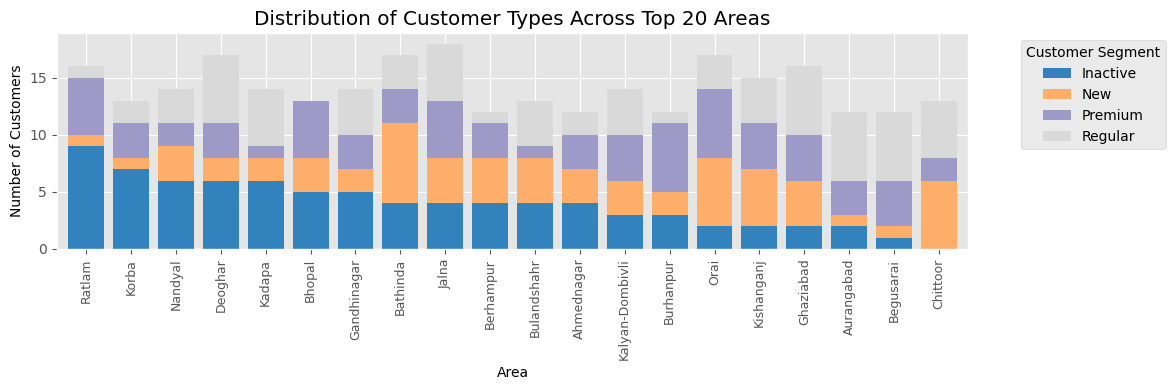

In [46]:
# Step 1: Crosstab for customer segment distribution by area
segment_area_dist = pd.crosstab(df['area'], df['customer_segment'])

# Step 2: Get top 20 areas by total customers
top_areas = segment_area_dist.sum(axis=1).nlargest(20).index
segment_area_top = segment_area_dist.loc[top_areas]

# Step 3: Sort areas by total customers
segment_area_top = segment_area_top.sort_values(by=segment_area_top.columns.tolist(), ascending=False)

# Step 4: Plot
segment_area_top.plot(kind='bar', stacked=True, figsize=(12,4), colormap='tab20c', width=0.8)

# Step 5: Formatting
plt.title('Distribution of Customer Types Across Top 20 Areas')
plt.xlabel('Area')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90, fontsize=9)
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



<h3>Which five regions generate the highest average order value?

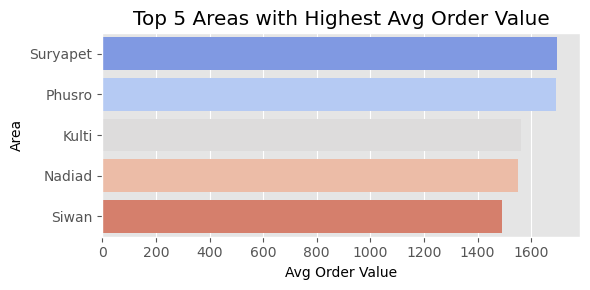

In [24]:
# Group by 'area' and calculate the mean avg_order_value
area_avg_order = df.groupby('area')['avg_order_value'].mean().reset_index()

#  Sort by avg_order_value in descending order and select the top 5
top_5_areas = area_avg_order.sort_values(by='avg_order_value', ascending=False).head(5)

#  Display the results
# Bar chart for top 5 areas by avg_order_value
plt.figure(figsize=(6, 3))
sns.barplot(data=top_5_areas, x='avg_order_value', y='area', palette='coolwarm')
plt.title('Top 5 Areas with Highest Avg Order Value')
plt.xlabel('Avg Order Value')
plt.ylabel('Area')
plt.tight_layout()
plt.show()


<h3>Who are the top five customers based on total number of purchases?

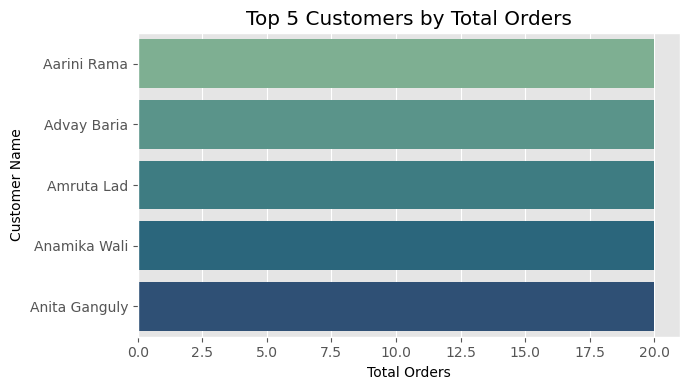

In [26]:
# Sort by total_orders and select the top 5 customers
top_customers = df.sort_values(by=['total_orders', 'customer_name'], ascending=[False, True]).head(5)

# Display only customer_name and total_orders
# Horizontal bar plot for top customers
plt.figure(figsize=(7, 4))
sns.barplot(data=top_customers, x='total_orders', y='customer_name', palette='crest')
plt.title('Top 5 Customers by Total Orders')
plt.xlabel('Total Orders')
plt.ylabel('Customer Name')
plt.tight_layout()
plt.show()


<h3>Which customer segment exhibits the highest repeat purchase behavior based on the total number of orders and the average orders per customer?

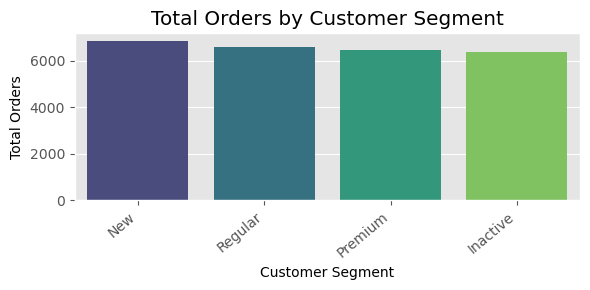

In [60]:
# Convert registration_date to datetime
df['registration_date'] = pd.to_datetime(df['registration_date'], format='%m/%d/%Y', errors='coerce')

# Group by customer_segment and calculate total orders and average orders per customer
segment_loyalty = df.groupby('customer_segment').agg(
    total_orders=('total_orders', 'sum'),
    avg_order_value=('avg_order_value', 'mean'),
    customer_count=('customer_id', 'nunique')
).reset_index()

# Calculate average orders per customer
segment_loyalty['avg_orders_per_customer'] = segment_loyalty['total_orders'] / segment_loyalty['customer_count']

# Sort by 'total_orders' to identify the most loyal customer segments
segment_loyalty = segment_loyalty.sort_values(by='total_orders', ascending=False)

# Optional: Plotting the results (e.g., total orders and avg orders per customer)
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3))

# Plot total orders by customer segment
sns.barplot(data=segment_loyalty, x='customer_segment', y='total_orders', ax=ax, palette='viridis')
ax.set_title('Total Orders by Customer Segment')
ax.set_ylabel('Total Orders')
ax.set_xlabel('Customer Segment')
plt.xticks(rotation=40, ha='right')
plt.tight_layout()
plt.show()

# Optional: Plot avg orders per customer by customer segment
fig, ax = plt.subplots(figsize=(6, 3))

sns.barplot(data=segment_loyalty, x='customer_segment', y='avg_orders_per_customer', ax=ax, palette='coolwarm')
ax.set_title('Average Orders Per Customer by Customer Segment')
ax.set_ylabel('Avg Orders Per Customer')
ax.set_xlabel('Customer Segment')
plt.xticks(rotation=40, ha='right')
plt.tight_layout()
plt.show()
